# Proyecto de curso de Analítica de Datos 
Se propone el análisis del dataset que contiene las estadísticas avanzadas de rendimiento de jugadores de
baloncesto en la NBA durante la temporada 2017-2018, así como los salarios de los mismos.

# Entendimiento de los datos

Importamos las librerías que vamos a utilizar

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Ignoramos los warnings debido a que no son importantes para lo que se pretende

In [62]:
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos con los que vamos a trabajar y conocemos su estructura

In [63]:
salaries = pd.read_csv("2017-18_NBA_salary.csv")
salaries.shape

(485, 28)

El dataset consta de 485 registros con 28 columnas. Vemos los primeros 15 registros del dataset

In [64]:
print(salaries.head(15))

                 Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G  \
0               Zhou Qi    815615       China               43   22  HOU  16   
1         Zaza Pachulia   3477600     Georgia               42   33  GSW  66   
2         Zach Randolph  12307692         USA               19   36  SAC  59   
3           Zach LaVine   3202217         USA               13   22  CHI  24   
4          Zach Collins   3057240         USA               10   20  POR  62   
5          Yogi Ferrell   1312611         USA               62   24  DAL  79   
6          Xavier Silas     74159         USA               62   30  BOS   2   
7   Xavier Rathan-Mayes     46080      Canada               62   23  MEM   5   
8       Wilson Chandler  12016854         USA               23   30  DEN  70   
9     Willy Hernangomez   1435750       Spain               35   23  TOT  45   
10          Willie Reed   1577230         USA               62   27  TOT  42   
11  Willie Cauley-Stein   3704160       

Vemos las etiquetas de columna y sus correspondientes tipos de variables

In [65]:
print(salaries.dtypes)

Player              object
Salary               int64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
VORP               float64
dtype: object


# Análisis de calidad
Veremos si hay datos con valores faltantes o si hay filas repetidas

In [66]:
print(salaries.isna().sum())
print("Número de filas repetidas:", salaries.size-salaries.drop_duplicates().size)

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64
Número de filas repetidas: 0


# Resumen estadístico
Veremos un resumen de estadísticas descriptivas

In [67]:
print(salaries.select_dtypes(include="object").describe(include="all"))
print(salaries.describe().iloc[:,:8])
print(salaries.describe().iloc[:,8:16])
print(salaries.describe().iloc[:,1:9])

            Player NBA_Country   Tm
count          485         485  485
unique         483          44   31
top     Kay Felder         USA  TOT
freq             3         374   55
           Salary  NBA_DraftNumber    Age      G      MP    PER    TS%   3PAr
count      485.00           485.00 485.00 485.00  485.00 485.00 483.00 483.00
mean   6636507.50            29.45  26.26  50.17 1154.14  13.26   0.54   0.34
std    7392601.91            21.13   4.27  24.87  811.36   8.77   0.11   0.23
min      46080.00             1.00  19.00   1.00    1.00 -41.10   0.00   0.00
25%    1471382.00            11.00  23.00  29.00  381.00   9.80   0.51   0.17
50%    3202217.00            25.00  26.00  59.00 1134.00  13.20   0.55   0.35
75%   10000000.00            47.00  29.00  71.00 1819.00  16.50   0.58   0.48
max   34682550.00            62.00  41.00  79.00 2898.00 134.10   1.50   1.00
         FTr   ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%
count 483.00 485.00 485.00 485.00 485.00 485.00 485.00 4

De aquí podemos observar algunas particularidades.

Observamos que las columnas que son porcentajes tienen una escala de 0 a 100. Sin embargo, la columna TS% tiene una escala de 0 a 1, con unos datos atípicos.

         TS%   ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%   USG%
count 483.00 485.00 485.00 485.00 485.00 485.00 485.00 483.00 485.00
mean    0.54   4.87  14.95   9.91  12.95   1.53   1.71  13.14  18.90
std     0.11   4.58   6.85   4.96   9.11   0.99   1.68   6.12   5.94
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
25%     0.51   1.80  10.20   6.20   6.90   1.00   0.60   9.90  15.00
50%     0.55   3.20  14.00   8.70   9.90   1.50   1.20  12.50  17.90
75%     0.58   7.00  18.80  13.30  17.60   1.90   2.20  15.75  22.20
max     1.50  35.90  37.60  26.50  49.40  12.50  13.40  66.70  45.10


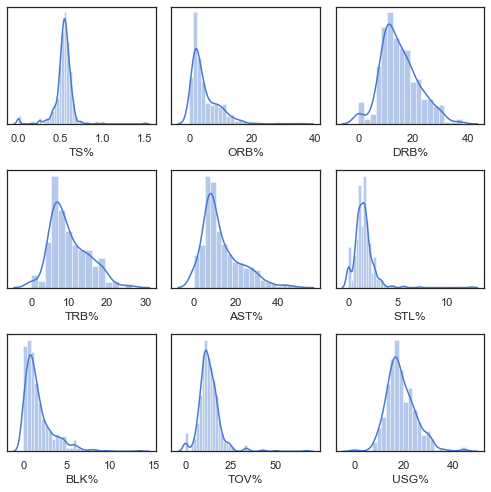

In [68]:
perc = list(filter(lambda x: x.endswith("%"), salaries.keys()))
print(salaries[perc].describe())
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(7, 7))
for i, col in enumerate(perc):
    sns.distplot(salaries[col], color="b", ax=axes[i//3, i%3])
plt.setp(axes, yticks=[])
plt.tight_layout()

Además, podemos ver que hay 485 filas. Pero hay 483 jugadores distintos. Hay un jugador que aparece en 3 equipos distintos.

In [69]:
salaries[salaries["Player"]=="Kay Felder"]

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
224,Kay Felder,1312611,USA,54,22,DET,1,3,-31.60,0.00,...,33.30,44.20,-0.10,0.00,-0.10,-1.00,-29.50,-11.90,-41.40,0.00
225,Kay Felder,1312611,USA,54,22,CHI,14,134,3.60,0.39,...,17.40,28.00,-0.50,0.10,-0.50,-0.17,-8.20,-3.30,-11.50,-0.30
226,Kay Felder,1312611,USA,54,22,TOT,15,137,2.90,0.38,...,17.90,28.40,-0.60,0.10,-0.50,-0.18,-8.70,-3.50,-12.10,-0.30


# Análisis de variables categórias
Como hemos observado, en los datos se encuentran algunas variables categóricas, como el equipo y el país de procedencia.

Agrupamos por equipo

In [70]:
salariesByTeam = salaries.groupby(['Tm']).mean()

Si analizamos esta agrupacion, en cuanto a la media salarial obtenemos lo siguiente

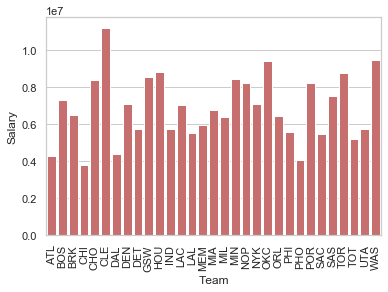

In [71]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
ax = sns.barplot(x=salariesByTeam.index, y=salariesByTeam["Salary"], color="r")
ax.set_xlabel("Team", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Podemos ver que la media salarial es mucho mayor, comparado con otro equipos, en los Cleveland Cavaliers. También en 
Oklahoma City Thunder y Washington Wizards

## Correlación de variables
Para identificar la correlación entre las variables del Dataframe se realiza una matriz de correlación. Sin embargo, es de principal interés la variable de salario. Por lo anterior, se extrae únicamente la correlación entre salario y las demás variables, como se muestra a continuación.

In [72]:
salaries.corr()['Salary'].sort_values(ascending=False)

Salary             1.00
WS                 0.59
VORP               0.57
OWS                0.56
MP                 0.51
DWS                0.51
Age                0.34
BPM                0.31
USG%               0.30
G                  0.30
PER                0.27
AST%               0.27
OBPM               0.27
DRB%               0.20
DBPM               0.18
TS%                0.17
WS/48              0.16
TRB%               0.14
BLK%               0.05
STL%               0.04
FTr                0.02
ORB%               0.00
TOV%              -0.04
3PAr              -0.07
NBA_DraftNumber   -0.38
Name: Salary, dtype: float64

El indicador que utiliza para el cálculo de la correlación es el coeficiente de Pearson, que indica la asociación **lineal** entre dos variables. Para la intuición de la relación entre las variables, usando una matriz de correlación, es necesario tener presente las siguientes consideraciones:

* Los valores pueden estar entre -1 y +1
* Un valor igual a 0 indica que no existe una relación lineal entre las dos variables, aunque no necesariamente son independientes.
* Un valor mayor a 0 indica una correlación lineal positiva, es decir, las variables son directamente proporcionales.
* Un valor menor a 0 indica una correlación lineal negativa, es decir, las variables son inversamente proporcionales.

Además, se dice con frecuencia que dos variables están altamente correlacionadas si su coeficiente es mayor o igual que 0.7. Sin embargo, el valor de referencia también depende del área de estudio y la cantidad de elementos en el análisis.

## Gráfica de correlación
A continuación, una gráfica de la matriz de correlación:

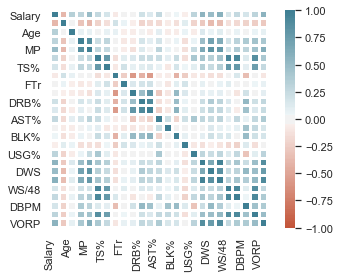

In [73]:
salary_correlation = salaries.corr()
ax = sns.heatmap(
    salary_correlation, 
    linewidth=2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

## Análisis de la correlación
De las condiciones del coeficiente de Pearson, inicialmente explicadas, y la gráfica de la matriz se pueden extraer las variables correlacionadas con el salario. Se muestran a continuación las variables escogidas:

In [74]:
salary_correlation = salary_correlation[(salary_correlation['Salary'] > 0.5) | (salary_correlation['Salary'] < -0.30)]
salary_correlation = salary_correlation['Salary']
salary_correlation

Salary             1.00
NBA_DraftNumber   -0.38
MP                 0.51
OWS                0.56
DWS                0.51
WS                 0.59
VORP               0.57
Name: Salary, dtype: float64

Para las variables positivamente correlacionadas fueron escogidas solamente aquellas que excedieran +0.5. En cuanto a las variables negativas, teniendo en cuenta que solo habían tres y sus valores eran más cercanos al 0 que al -1, se escogió la menor.

Grafiquemos cómo se relaciona el salario y el número del draft. Escogeremos los jugadores de menos de 23 años ya que aquí se encuentra la mayor cantidad de Rookies y si incluimos hasta los 25 años, veremos algunos jugadores que han renovado contrato.

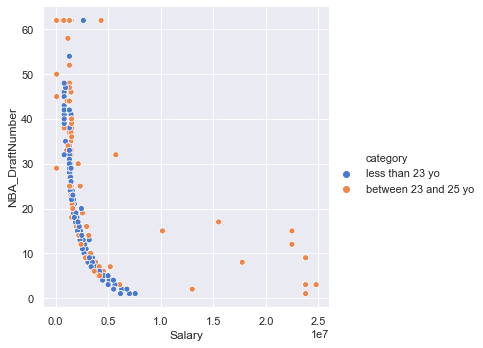

In [75]:
t = salaries[salaries["Age"]<25]
sns.set(style="darkgrid", palette="muted", color_codes=True)
t["category"] = list(map(lambda x: "less than 23 yo" if not x else "between 23 and 25 yo", (23<=t["Age"]) & (t["Age"]<25)))
sns.relplot(x="Salary", y="NBA_DraftNumber", hue="category", data=t)

De lo anterior podemos ver que hay una relación inversamente proporcional. Además, podemos ver que hay unos datos atípicos que son los jugadores que han renovado contrato ganando más dinero.

Veamos cómo se relaciona la variable WS y Age con el salario. Para esto, tomaremos los jugadores de menos de 27 años para que una mejor visualización.

Text(0.5, 1.0, 'WS vs Age vs Salary')

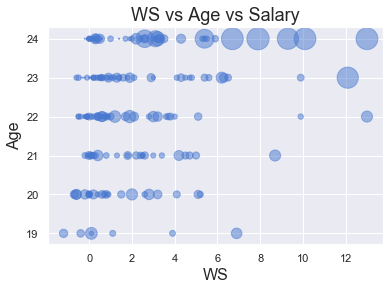

In [76]:
plt.scatter(t['WS'], t['Age'], 
             s=t["Salary"]/50000,
             alpha=0.5)
plt.xlabel("WS", size=16)
plt.ylabel("Age", size=16)
plt.title("WS vs Age vs Salary", size=18)

Podemos ver que a mayor WS y mayor edad, el salario es mayor. Además, se ve que a medida que los jugadores van envejeciendo, no garantiza totalmente que su WS vaya a mejorar.

Acabamos de ver las variables independientes más correlacionadas con la variable dependiente. Ahora veremos las variables independientes más correlacionadas entre ellas:

In [77]:
def get_most_correlated_variables(df):
    indep_corr = df.corr()
    arr = pd.DataFrame(columns=["start", "end", "corr"])
    for i in indep_corr.columns:
        for j in indep_corr.columns:
            df = pd.DataFrame({"start": [i],
                               "end": [j],
                               "corr": [indep_corr.loc[i, j]]})
            arr = arr.append(df)
            
    arr = arr[arr["start"]>arr["end"]]
    arr["abs"]=abs(arr["corr"])
    arr = arr.sort_values(by=["abs"], ascending=False)[["start", "end", "corr"]]
    arr.index = range(arr.index.size)
    arr = arr[abs(arr["corr"])>0.5]
    return arr
arr = get_most_correlated_variables(salaries[salaries.columns.drop("Salary")])
print(arr)

    start   end  corr
0      WS   OWS  0.96
1   WS/48   PER  0.93
2   WS/48  OBPM  0.93
3     PER  OBPM  0.91
4    TRB%  DRB%  0.91
5    OBPM   BPM  0.91
6      WS  VORP  0.91
7      MP     G  0.87
8   WS/48   BPM  0.87
9    VORP   OWS  0.87
10    PER   BPM  0.86
11     WS   DWS  0.84
12     MP   DWS  0.82
13   TRB%  ORB%  0.80
14    TS%  OBPM  0.79
15     WS    MP  0.78
16  WS/48   TS%  0.78
17    TS%   PER  0.78
18   VORP   DWS  0.75
19    TS%   BPM  0.74
20      G   DWS  0.71
21    OWS    MP  0.66
22    OWS   DWS  0.65
23     WS     G  0.63
24   VORP    MP  0.61
25   ORB%  3PAr -0.58
26   TRB%  BLK%  0.57
27   TRB%  3PAr -0.55
28     WS   BPM  0.53
29    DWS  DBPM  0.52
30   DRB%  DBPM  0.52
31   ORB%  BLK%  0.51
32   DBPM  BLK%  0.51
33   VORP   BPM  0.50


Encontraremos cuáles son las variables que más aparecen en esta lista:

In [78]:
var = list(salaries.columns)
f = lambda x: list(arr["start"]).count(x) + list(arr["end"]).count(x)
var = sorted(var, key=f, reverse=True)
list(zip(var, list(map(f, var))))

[('DWS', 6),
 ('WS', 6),
 ('BPM', 6),
 ('MP', 5),
 ('VORP', 5),
 ('PER', 4),
 ('TS%', 4),
 ('TRB%', 4),
 ('OWS', 4),
 ('WS/48', 4),
 ('OBPM', 4),
 ('G', 3),
 ('ORB%', 3),
 ('BLK%', 3),
 ('DBPM', 3),
 ('3PAr', 2),
 ('DRB%', 2),
 ('Player', 0),
 ('Salary', 0),
 ('NBA_Country', 0),
 ('NBA_DraftNumber', 0),
 ('Age', 0),
 ('Tm', 0),
 ('FTr', 0),
 ('AST%', 0),
 ('STL%', 0),
 ('TOV%', 0),
 ('USG%', 0)]

Podemos ver que las variables WS, OWS, DWS y WS/48 son de las que más aparecen. Miremos qué sucede si las quitamos.

In [79]:
get_most_correlated_variables(salaries[salaries.columns.drop(["Salary", "WS", "OWS", "DWS", "WS/48"])])

,start,end,corr
0,PER,OBPM,0.91
1,TRB%,DRB%,0.91
2,OBPM,BPM,0.91
3,MP,G,0.87
4,PER,BPM,0.86
5,TRB%,ORB%,0.80
6,TS%,OBPM,0.79
7,TS%,PER,0.78
8,TS%,BPM,0.74
9,VORP,MP,0.61


Se reduce a la mitad la cantidad de parejas de las cuales el valor absoluto de la correlación sobrepasa el 0.5. Podemos ver también que aparecen las variables BPM, OBPM y DBPM. Es claro que cuando hay una estadística general y luego aparecen las mismas pero de forma ofensiva y defensiva, habrá una mayor correlación.

Veamos cómo se relacionan las variables WS, OWS, DWS y WS/48

<Figure size 1296x1296 with 0 Axes>

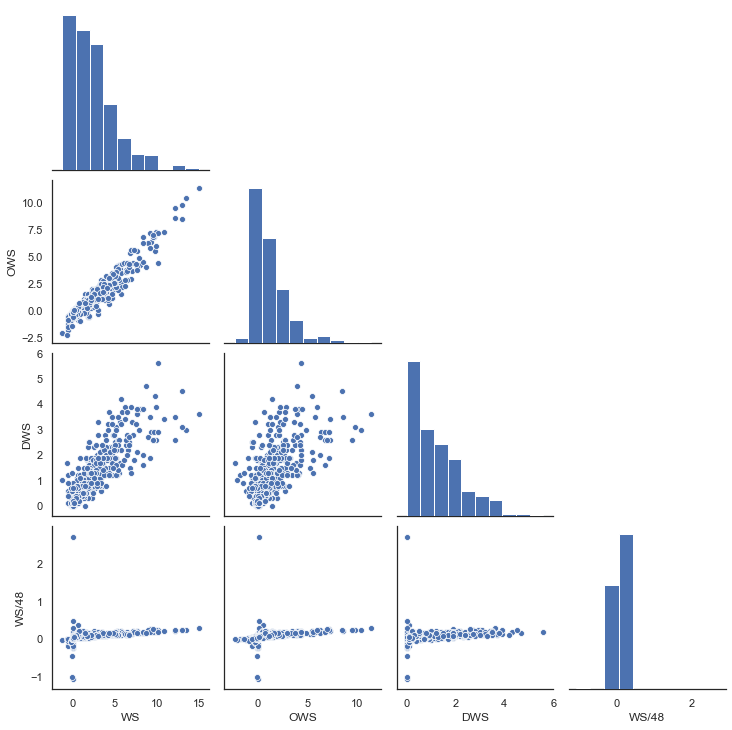

In [80]:
plt.figure(figsize=(18,18))
sns.set(style="white")
ax = sns.pairplot(salaries[["WS", "OWS", "DWS", "WS/48"]], corner=True)

Se pueden ver grandes correlaciones de manera gráfica, entre WS y OWS hay 0.96 de correlación, casi pinta una línea recta. Entre las demás se nota una alta correlación también.